In [17]:
#载入数据
from sklearn.datasets import load_breast_cancer
 
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
print('data shape:{0};no. positive:{1};no. negative:{2}'.format(X.shape,y[y==1].shape[0],y[y==0].shape[0]))

data shape:(569, 30);no. positive:357;no. negative:212


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

 
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('train score:{0:.6f};test score:{1:.6f}'.format(train_score,test_score))
 
#检查预测正确率
y_pred=model.predict(X_test)
print('matches:{0}/{1}'.format(np.equal(y_pred,y_test).shape[0],y_test.shape[0]))

train score:0.958242;test score:0.956140
matches:114/114


In [3]:
#模型预测的自信度
#找出自信度不足90%的模型预测
y_pred_proba=model.predict_proba(X_test)
result=y_pred_proba[y_pred_proba[:,0]>0.1]#y_pred_proba[:,0]>0.1获得布尔值，最后显示true值
result[result[:,1]>0.1]

array([[0.66432805, 0.33567195],
       [0.15999861, 0.84000139],
       [0.14879024, 0.85120976],
       [0.68074686, 0.31925314],
       [0.61442203, 0.38557797],
       [0.81391795, 0.18608205],
       [0.12071043, 0.87928957],
       [0.78896233, 0.21103767],
       [0.10044235, 0.89955765],
       [0.72194677, 0.27805323],
       [0.88093066, 0.11906934],
       [0.88730255, 0.11269745],
       [0.68163901, 0.31836099],
       [0.19695685, 0.80304315],
       [0.18916272, 0.81083728],
       [0.56191962, 0.43808038],
       [0.24951618, 0.75048382],
       [0.46637282, 0.53362718],
       [0.10521599, 0.89478401]])

In [18]:
#模型优化
#用多项式特征
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import time
 
#约定俗成:
#*args：可以理解为长度不固定地列表。
#**kwarg：可以理解为长度不固定的字典
def polynomial_model(degree=1,**kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)#include_bias：默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项
    logistic_reg=LogisticRegression(**kwarg)
    pipeline=Pipeline([('polynomial_features',polynomial_features),
                       ('logistic_reg',logistic_reg)])
    return pipeline
 
model=polynomial_model(degree=2,penalty='l1',solver='liblinear')#penalty:惩罚 
#决定惩罚项选择的有2个参数：dual和solver，如果要选L1范数，dual必须是False，solver必须是liblinear
#L1范数作为正则项，可使参数稀疏化，即自动帮助我们选出那些对模型有关联的特征
 
start=time.perf_counter()
model.fit(X_train,y_train)
poly_train_score=model.score(X_train,y_train)
poly_test_score=model.score(X_test,y_test)
print('elapse:{0:.6f};poly_train_score:{1:.6f};poly_test_score:{2:.6f}'.format(time.perf_counter()-start,poly_train_score,poly_test_score))

elapse:0.065984;poly_train_score:0.995604;poly_test_score:0.964912


In [5]:
#查看有多少特征没有被丢弃，即对应的参数西塔非0
coefs=model.named_steps['logistic_reg'].coef_
#named_steps 流水线中的一条流水线名
#coef_ 属性里保存的就是模型参数
print("总特征数:{0};非0特征数:{1}".format(coefs.shape, np.count_nonzero(coefs)))
#输入特征由原来的 30个增加到了 495 个，最终大多数特征都被丢弃，只保留了86 个有效特

总特征数:(1, 495);非0特征数:109


C:\Users\ichen\PycharmProjects\python_study\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ichen\PycharmProjects\python_study\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ichen\PycharmProjects\python_study\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ichen\PycharmProjects\python_study\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ichen\PycharmProjects\python_study\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ichen\Pycha

<module 'matplotlib.pyplot' from 'C:\\Users\\ichen\\PycharmProjects\\python_study\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

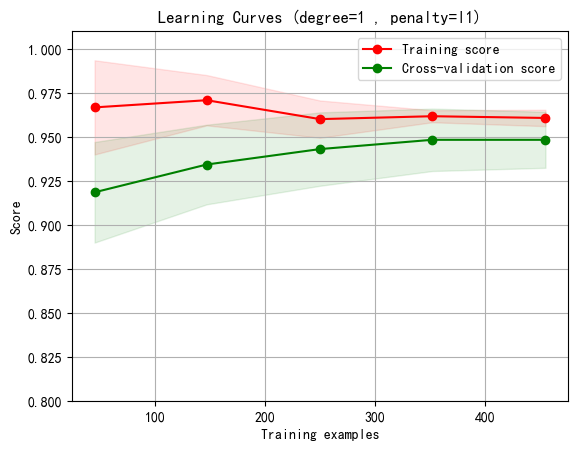

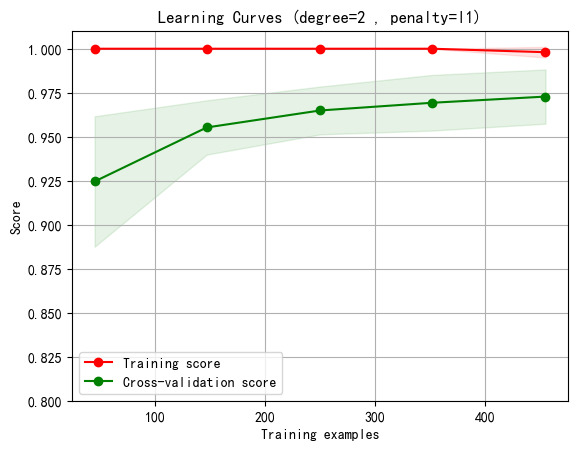

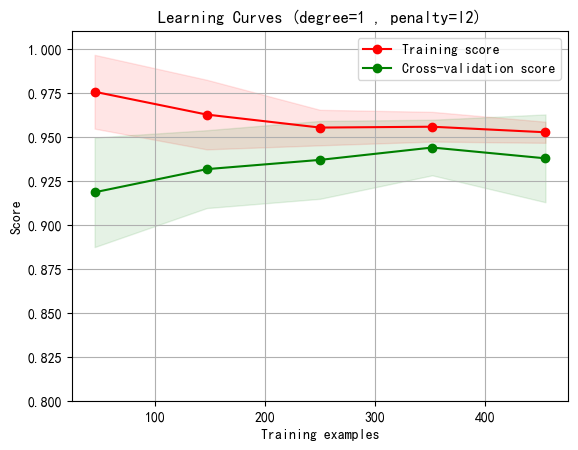

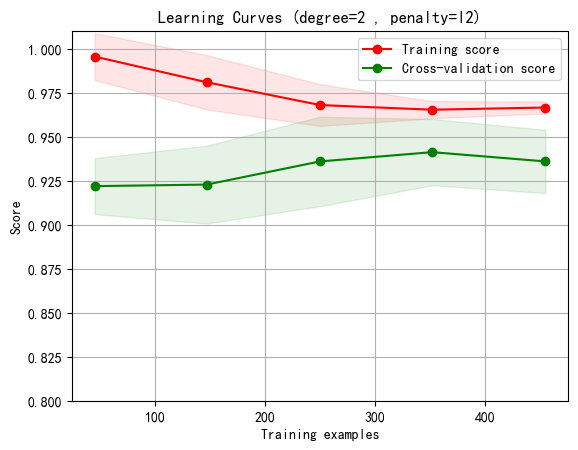

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
 
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()# 生成网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score") 
    plt.legend(loc="best")#添加图例
    return plt
 
from sklearn.model_selection import ShuffleSplit
 
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

plot_learning_curve(polynomial_model(degree=1,penalty='l1',solver='liblinear'),"Learning Curves (degree=1 , penalty=l1)",X,y,ylim=(0.8,1.01),cv=cv)
plot_learning_curve(polynomial_model(degree=2,penalty='l1',solver='liblinear'),"Learning Curves (degree=2 , penalty=l1)",X,y,ylim=(0.8,1.01),cv=cv)
plot_learning_curve(polynomial_model(degree=1,penalty='l2',solver='lbfgs'),"Learning Curves (degree=1 , penalty=l2)",X,y,ylim=(0.8,1.01),cv=cv)
plot_learning_curve(polynomial_model(degree=2,penalty='l2',solver='lbfgs'),"Learning Curves (degree=2 , penalty=l2)",X,y,ylim=(0.8,1.01),cv=cv)